In [14]:
import os
import cooler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from cooltools import expected_cis
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import LogNorm
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
import mpl_toolkits
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Calculate mapping statistics

In [2]:
header, index, stats = ['Total reads', 'Unmapped reads', 'Single side mapped reads', 
                        'Double side mapped reads', 'Duplicates', 'Valid reads'], [], []

for stats_file in sorted([x for x in os.listdir('/DATA/projects/bvs_alleles/sox2_rcmc_custom/stats/') if '.stats' in x and 'rcmc' not in x and 'filtered' not in x]):
    stats_tmp = pd.read_csv(f'/DATA/projects/bvs_alleles/sox2_rcmc_custom/stats/{stats_file}', sep = '\t', header = None)
    stats.append(list(stats_tmp.transpose()[[0, 1, 2, 3, 4, 5]].values[1]))
    index.append(stats_file.split('.')[0])
stats_full = pd.DataFrame(stats, columns = header, index = index).apply(pd.to_numeric)
stats_full

Total reads  Unmapped reads  Single side mapped reads  \
CM1846_rep1    266823104       110071081                  37050409   
CM1846_rep2    651785079       235928599                 107975137   
CM2094_rep1    316216546       118825677                  43611412   
CM2094_rep2    324534750       119576804                  49632891   
CM2167_rep1    832692616       343031972                  99104101   
CM2167_rep2    591932940       220174267                  89541474   
CM2266_rep1   1410769528       555677684                 142556133   
CM2266_rep2    350235506       130883379                  55437766   
CM2267_rep1    542456774       210715257                  69912589   
CM2267_rep2    653958513       253390515                 104862190   
CM2291_rep1    810542981       315488334                 101150974   
CM2291_rep2    554514403       244600653                  99531221   

             Double side mapped reads  Duplicates  Valid reads  
CM1846_rep1                 119701614    29022542     90679072  
CM1846_rep2                 307881343   165939639    141941704  
CM2094_rep1                 153779457    36554705    117224752  
CM2094_rep2                 155325055    83032514     72292541  
CM2167_rep1                 390556543    90104412    300452131  
CM2167_rep2                 282217199   156256729    125960470  
CM2266_rep1                 712535711   141707304    570828407  
CM2266_rep2                 163914361    92109829     71804532  
CM2267_rep1                 261828928    62869389    198959539  
CM2267_rep2                 295705808   162245992    133459816  
CM2291_rep1                 393903673    91796250    302107423  
CM2291_rep2                 210382529   122639419     87743110

In [3]:
header, index, stats = ['Total reads', 'Unmapped reads', 'SS reads', 'DS reads', 'Duplicates', 'Valid reads'], [], []

for stats_file in sorted([x for x in os.listdir('/DATA/projects/bvs_alleles/sox2_rcmc_custom/stats/') if '.stats' in x and 'rcmc' in x and '129' not in x and 'CAST' not in x and 'XA' not in x and 'filtered' not in x]):
    stats_tmp = pd.read_csv(f'/DATA/projects/bvs_alleles/sox2_rcmc_custom/stats/{stats_file}', sep = '\t', header = None)
    stats.append(list(stats_tmp.transpose()[[0, 1, 2, 3, 4, 5]].values[1]))
    index.append(stats_file.split('_rcmc')[0])
stats_rcmc = pd.DataFrame(stats, columns = header, index = index).apply(pd.to_numeric)

stats_rcmc = stats_rcmc[['Total reads']]

In [4]:
header, index, stats = ['129 reads DS', 'Unmapped reads', 'SS reads', 'DS reads', 'Duplicates', 'Valid reads'], [], []

for stats_file in sorted([x for x in os.listdir('/DATA/projects/bvs_alleles/sox2_rcmc_custom/stats/') if '.stats' in x and 'rcmc' in x and '129' in x and 'ds.' in x and 'filtered' in x]):
    stats_tmp = pd.read_csv(f'/DATA/projects/bvs_alleles/sox2_rcmc_custom/stats/{stats_file}', sep = '\t', header = None)
    stats.append(list(stats_tmp.transpose()[[0, 1, 2, 3, 4, 5]].values[1]))
    index.append(stats_file.split('_rcmc')[0])
stats_129_ds = pd.DataFrame(stats, columns = header, index = index).apply(pd.to_numeric)

stats_129_ds = stats_129_ds[['129 reads DS']]

In [5]:
header, index, stats = ['129 reads SS', 'Unmapped reads', 'SS reads', 'DS reads', 'Duplicates', 'Valid reads'], [], []

for stats_file in sorted([x for x in os.listdir('/DATA/projects/bvs_alleles/sox2_rcmc_custom/stats/') if '.stats' in x and 'rcmc' in x and '129' in x and 'ss.' in x and 'filtered' in x]):
    stats_tmp = pd.read_csv(f'/DATA/projects/bvs_alleles/sox2_rcmc_custom/stats/{stats_file}', sep = '\t', header = None)
    stats.append(list(stats_tmp.transpose()[[0, 1, 2, 3, 4, 5]].values[1]))
    index.append(stats_file.split('_rcmc')[0])
stats_129_ss = pd.DataFrame(stats, columns = header, index = index).apply(pd.to_numeric)

stats_129_ss = stats_129_ss[['129 reads SS']]

In [6]:
header, index, stats = ['CAST reads DS', 'Unmapped reads', 'SS reads', 'DS reads', 'Duplicates', 'Valid reads'], [], []

for stats_file in sorted([x for x in os.listdir('/DATA/projects/bvs_alleles/sox2_rcmc_custom/stats/') if '.stats' in x and 'rcmc' in x and 'CAST' in x and 'ds.' in x and 'filtered' in x]):
    stats_tmp = pd.read_csv(f'/DATA/projects/bvs_alleles/sox2_rcmc_custom/stats/{stats_file}', sep = '\t', header = None)
    stats.append(list(stats_tmp.transpose()[[0, 1, 2, 3, 4, 5]].values[1]))
    index.append(stats_file.split('_rcmc')[0])
stats_cast_ds = pd.DataFrame(stats, columns = header, index = index).apply(pd.to_numeric)

stats_cast_ds = stats_cast_ds[['CAST reads DS']]

In [7]:
header, index, stats = ['CAST reads SS', 'Unmapped reads', 'SS reads', 'DS reads', 'Duplicates', 'Valid reads'], [], []

for stats_file in sorted([x for x in os.listdir('/DATA/projects/bvs_alleles/sox2_rcmc_custom/stats/') if '.stats' in x and 'rcmc' in x and 'CAST' in x and 'ss.' in x and 'filtered' in x]):
    stats_tmp = pd.read_csv(f'/DATA/projects/bvs_alleles/sox2_rcmc_custom/stats/{stats_file}', sep = '\t', header = None)
    stats.append(list(stats_tmp.transpose()[[0, 1, 2, 3, 4, 5]].values[1]))
    index.append(stats_file.split('_rcmc')[0])
stats_cast_ss = pd.DataFrame(stats, columns = header, index = index).apply(pd.to_numeric)

stats_cast_ss = stats_cast_ss[['CAST reads SS']]

In [8]:
stats_rcmc = pd.concat([stats_rcmc, stats_129_ds, stats_cast_ds, stats_129_ss, stats_cast_ss], axis = 1)

stats_rcmc_sox2 = stats_rcmc.loc[[x for x in stats_rcmc.index if 'sox2' in x]]
stats_rcmc_sox2.index = [x.split('.')[0] for x in stats_rcmc_sox2.index]
stats_rcmc_sox2.columns = [x + ' Sox2' for x in stats_rcmc_sox2.columns]

stats = pd.concat([stats_full, stats_rcmc_sox2], axis = 1)
stats['Percentage mapped'] = round(stats['Double side mapped reads']/stats['Total reads']*100, 2)
stats['Percentage duplicates'] = round(stats['Duplicates']/stats['Double side mapped reads']*100, 2)
stats['Percentage Sox2'] = round(stats['Total reads Sox2']/stats['Valid reads']*100 , 3)
stats['Percentage 129/CAST DS'] = round((stats['129 reads DS Sox2']+stats['CAST reads DS Sox2'])/stats['Total reads Sox2']*100 , 3)
stats['Percentage 129/CAST SS'] = round((stats['129 reads SS Sox2']+stats['CAST reads SS Sox2'])/stats['Total reads Sox2']*100 , 3)

stats

Total reads  Unmapped reads  Single side mapped reads  \
CM1846_rep1    266823104       110071081                  37050409   
CM1846_rep2    651785079       235928599                 107975137   
CM2094_rep1    316216546       118825677                  43611412   
CM2094_rep2    324534750       119576804                  49632891   
CM2167_rep1    832692616       343031972                  99104101   
CM2167_rep2    591932940       220174267                  89541474   
CM2266_rep1   1410769528       555677684                 142556133   
CM2266_rep2    350235506       130883379                  55437766   
CM2267_rep1    542456774       210715257                  69912589   
CM2267_rep2    653958513       253390515                 104862190   
CM2291_rep1    810542981       315488334                 101150974   
CM2291_rep2    554514403       244600653                  99531221   

             Double side mapped reads  Duplicates  Valid reads  \
CM1846_rep1                 119701614    29022542     90679072   
CM1846_rep2                 307881343   165939639    141941704   
CM2094_rep1                 153779457    36554705    117224752   
CM2094_rep2                 155325055    83032514     72292541   
CM2167_rep1                 390556543    90104412    300452131   
CM2167_rep2                 282217199   156256729    125960470   
CM2266_rep1                 712535711   141707304    570828407   
CM2266_rep2                 163914361    92109829     71804532   
CM2267_rep1                 261828928    62869389    198959539   
CM2267_rep2                 295705808   162245992    133459816   
CM2291_rep1                 393903673    91796250    302107423   
CM2291_rep2                 210382529   122639419     87743110   

             Total reads Sox2  129 reads DS Sox2  CAST reads DS Sox2  \
CM1846_rep1           3680490             767590              688178   
CM1846_rep2           3365025             579665              534222   
CM2094_rep1           4348978             868697              724598   
CM2094_rep2           2903238             498950              420406   
CM2167_rep1           7273113            1377645             1261166   
CM2167_rep2           2480227             420136              394023   
CM2266_rep1          21710969            4369470             3840674   
CM2266_rep2           1427023             247057              221285   
CM2267_rep1           5638512            1100433              978535   
CM2267_rep2           3404845             589132              539461   
CM2291_rep1           7885179            1490251             1312165   
CM2291_rep2           1432651             247401              222524   

             129 reads SS Sox2  CAST reads SS Sox2  Percentage mapped  \
CM1846_rep1            1556641             1409260              44.86   
CM1846_rep2            1354942             1250314              47.24   
CM2094_rep1            1829600             1557145              48.63   
CM2094_rep2            1150923              979745              47.86   
CM2167_rep1            3028248             2779928              46.90   
CM2167_rep2             986905              928920              47.68   
CM2266_rep1            9491014             8474315              50.51   
CM2266_rep2             577485              515176              46.80   
CM2267_rep1            2405396             2142480              48.27   
CM2267_rep2            1365702             1247310              45.22   
CM2291_rep1            3364868             2965523              48.60   
CM2291_rep2             566366              507138              37.94   

             Percentage duplicates  Percentage Sox2  Percentage 129/CAST DS  \
CM1846_rep1                  24.25            4.059                  39.554   
CM1846_rep2                  53.90            2.371                  33.102   
CM2094_rep1                  23.77            3.710                  36.636   
CM2094_rep2                  53.46      

# Plot RCMC maps

In [10]:
# Functions to help with plotting
def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    import itertools
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im

def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

### Goel et al. (Nature Genetics)

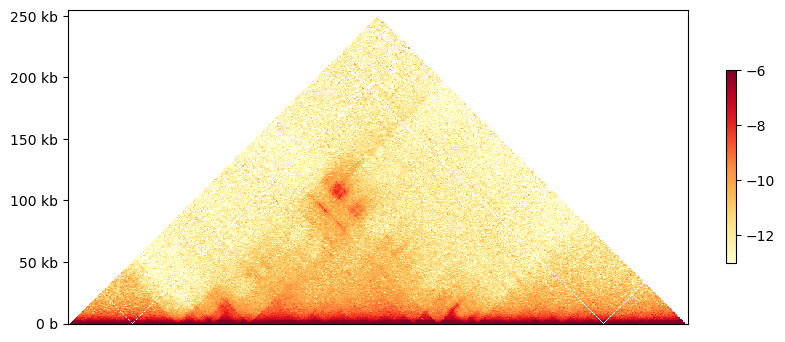

In [22]:
data_path = '/DATA/projects/bvs_alleles/sox2_rcmc_custom/'
region = ('chr3', 34_650_000, 34_900_000)
resolution = 500
clr = cooler.Cooler(f'{data_path}/GSM6281849_RCMC_BR1_merged_allCap_WT_mm39.merged.50.mcool::resolutions/{resolution}')
data = clr.matrix(balance=True).fetch(region)

f, ax = plt.subplots(figsize=(10, 10))
im = pcolormesh_45deg(ax, np.log2(data), start = region[1], resolution = resolution, vmin = -13, vmax = -6, cmap='YlOrRd')
plt.colorbar(im, shrink = 0.25)
ax.set_aspect(0.5)
ax.set_ylim(0, 255000)
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)
ax.set_xlim(region[1]-1000, region[2]+1000)
plt.show()

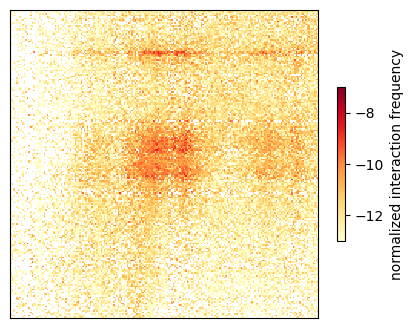

In [26]:
data_path = '/DATA/projects/bvs_alleles/sox2_rcmc_custom/'
resolution = 200
clr = cooler.Cooler(f'{data_path}/GSM6281849_RCMC_BR1_merged_allCap_WT_mm39.merged.50.mcool::resolutions/{resolution}')
data = clr.matrix(balance=True, sparse = True).fetch('chr3:34794057-34834056', 'chr3:34685377-34725376').toarray()

fig, ax = plt.subplots(figsize=(5, 4))
im = ax.matshow(np.log2(data), cmap = 'YlOrRd', vmin = -13, vmax = -7)
plt.colorbar(im, shrink = 0.5, label = 'normalized interaction frequency')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

# Generated RCMC data

1. F121/9 GFP+/mCh+ = CM1846
2. LP-116kb_Sox2P = CM2167
3. LP-116kb_Sox2P_mChDel = CM2267
4. LP-161kb_Sox2P = CM2094  
5. LP-161kb_Sox2P_mChDel = CM2266
6. LP-161kb_Sox2P_CDS_mChDel = CM2291

In [27]:
sox2_start = 34658658
sox2_end = 34661124
scr_start = 34762792
scr_end = 34775778
landing_pad_161kb_insert_start = 34598480
landing_pad_161kb_insert_end = 34603292

In [29]:
def calculate_observed_over_expected_rcmc_matrix(matrix, expected, chromosome):
    oe_matrix = np.zeros((len(matrix), len(matrix)))
    expected_values = expected[(expected['region1'] == chromosome) & (expected['region2'] == chromosome)]
    expected_values = expected_values['balanced.avg'].values
    for i in range(0, len(matrix)):
        diaginal_indices_to_replace = np.arange(len(matrix)-i)
        oe_matrix[diaginal_indices_to_replace, diaginal_indices_to_replace+i] = np.diag(matrix, k = i) / expected_values[i]
        oe_matrix[diaginal_indices_to_replace+i, diaginal_indices_to_replace] = np.diag(matrix, k = i) / expected_values[i]
    return(oe_matrix)

INFO:root:creating a Pool of 24 workers
INFO:root:creating a Pool of 24 workers


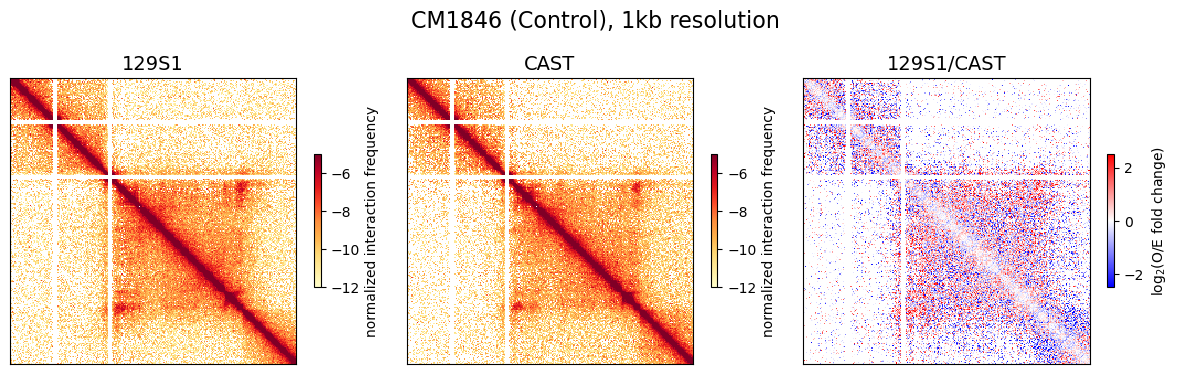

In [31]:
# Define parameters
data_path = '/DATA/projects/bvs_alleles/sox2_rcmc_custom/'
sample = 'CM1846'
title = 'Control'
resolution = 1000
chromosome = '3'
start = 34560000
end = 34820000
vmax = -5
vmin = -12

cool_file_129 = cooler.Cooler(f'{data_path}/coolers/{sample}.sox2_rcmc.129_allele.ss.mcool::resolutions/{resolution}')
cool_file_cast = cooler.Cooler(f'{data_path}/coolers/{sample}.sox2_rcmc.CAST_allele.ss.mcool::resolutions/{resolution}')
expected_129 = expected_cis(cool_file_129, ignore_diags = 0, nproc = 24)
expected_cast = expected_cis(cool_file_cast, ignore_diags = 0, nproc = 24)

fig = plt.figure(figsize = (12, 4))
plt.suptitle(sample + ' (' + title + '), ' + str(resolution//1000) + 'kb resolution', fontsize = 16)

matrix_129 = cool_file_129.matrix(balance=True, sparse=True).fetch(f'{chromosome}:{start}-{end}').toarray()
matrix_129 = np.nan_to_num(matrix_129)
matrix_cast = cool_file_cast.matrix(balance=True, sparse=True).fetch(f'{chromosome}:{start}-{end}').toarray()
matrix_cast = np.nan_to_num(matrix_cast)
oe_matrix_129 = calculate_observed_over_expected_rcmc_matrix(matrix_129, expected_129, chromosome)
oe_matrix_cast = calculate_observed_over_expected_rcmc_matrix(matrix_cast, expected_cast, chromosome)

ax = fig.add_subplot(131)
ax.set_title('129S1', fontsize = 14)
im = ax.matshow(np.log2(matrix_129), cmap='YlOrRd', vmin = vmin, vmax = vmax)
fig.colorbar(im, shrink = 0.4, label = 'normalized interaction frequency')
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(132)
ax.set_title('CAST', fontsize = 14)
im = ax.matshow(np.log2(matrix_cast), cmap='YlOrRd', vmin = vmin, vmax = vmax)
fig.colorbar(im, shrink = 0.4, label = 'normalized interaction frequency')
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(133)
ax.set_title('129S1/CAST', fontsize = 14)
im = ax.matshow(np.log2(oe_matrix_129/oe_matrix_cast), cmap='bwr', vmin = -2.5, vmax = 2.5)
fig.colorbar(im, shrink = 0.4, label = 'log$_2$(O/E fold change)')
plt.xticks([], [])
plt.yticks([], [])

plt.tight_layout()
plt.show()

INFO:root:creating a Pool of 24 workers
INFO:root:creating a Pool of 24 workers


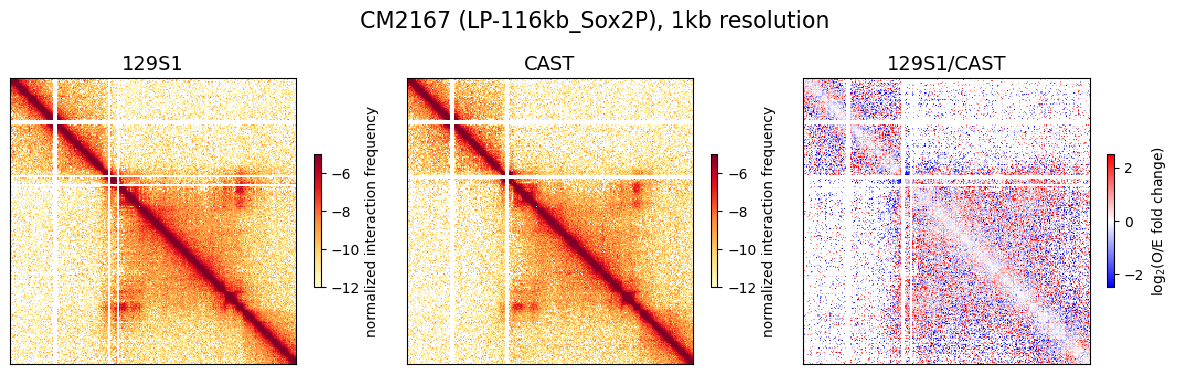

In [32]:
# Define parameters
data_path = '/DATA/projects/bvs_alleles/sox2_rcmc_custom/'
sample = 'CM2167'
title = 'LP-116kb_Sox2P'
resolution = 1000
chromosome = '3'
start = 34560000
end = 34820000
vmax = -5
vmin = -12

cool_file_129 = cooler.Cooler(f'{data_path}/coolers/{sample}.sox2_rcmc.129_allele.ss.mcool::resolutions/{resolution}')
cool_file_cast = cooler.Cooler(f'{data_path}/coolers/{sample}.sox2_rcmc.CAST_allele.ss.mcool::resolutions/{resolution}')
expected_129 = expected_cis(cool_file_129, ignore_diags = 0, nproc = 24)
expected_cast = expected_cis(cool_file_cast, ignore_diags = 0, nproc = 24)

fig = plt.figure(figsize = (12, 4))
plt.suptitle(sample + ' (' + title + '), ' + str(resolution//1000) + 'kb resolution', fontsize = 16)

matrix_129 = cool_file_129.matrix(balance=True, sparse=True).fetch(f'{chromosome}:{start}-{end}').toarray()
matrix_129 = np.nan_to_num(matrix_129)
matrix_cast = cool_file_cast.matrix(balance=True, sparse=True).fetch(f'{chromosome}:{start}-{end}').toarray()
matrix_cast = np.nan_to_num(matrix_cast)
oe_matrix_129 = calculate_observed_over_expected_rcmc_matrix(matrix_129, expected_129, chromosome)
oe_matrix_cast = calculate_observed_over_expected_rcmc_matrix(matrix_cast, expected_cast, chromosome)

ax = fig.add_subplot(131)
ax.set_title('129S1', fontsize = 14)
im = ax.matshow(np.log2(matrix_129), cmap='YlOrRd', vmin = vmin, vmax = vmax)
fig.colorbar(im, shrink = 0.4, label = 'normalized interaction frequency')
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(132)
ax.set_title('CAST', fontsize = 14)
im = ax.matshow(np.log2(matrix_cast), cmap='YlOrRd', vmin = vmin, vmax = vmax)
fig.colorbar(im, shrink = 0.4, label = 'normalized interaction frequency')
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(133)
ax.set_title('129S1/CAST', fontsize = 14)
im = ax.matshow(np.log2(oe_matrix_129/oe_matrix_cast), cmap='bwr', vmin = -2.5, vmax = 2.5)
fig.colorbar(im, shrink = 0.4, label = 'log$_2$(O/E fold change)')
plt.xticks([], [])
plt.yticks([], [])

plt.tight_layout()
plt.show()

INFO:root:creating a Pool of 24 workers
INFO:root:creating a Pool of 24 workers


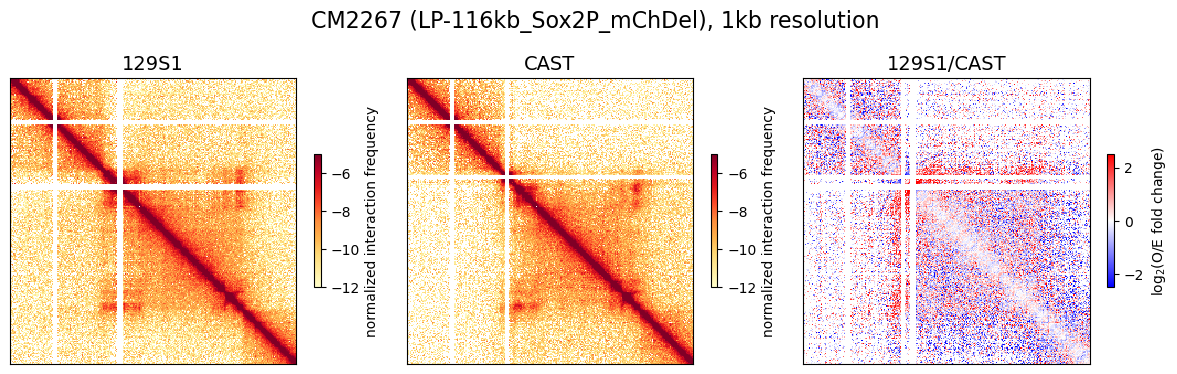

In [33]:
# Define parameters
data_path = '/DATA/projects/bvs_alleles/sox2_rcmc_custom/'
sample = 'CM2267'
title = 'LP-116kb_Sox2P_mChDel'
resolution = 1000
chromosome = '3'
start = 34560000
end = 34820000
vmax = -5
vmin = -12

cool_file_129 = cooler.Cooler(f'{data_path}/coolers/{sample}.sox2_rcmc.129_allele.ss.mcool::resolutions/{resolution}')
cool_file_cast = cooler.Cooler(f'{data_path}/coolers/{sample}.sox2_rcmc.CAST_allele.ss.mcool::resolutions/{resolution}')
expected_129 = expected_cis(cool_file_129, ignore_diags = 0, nproc = 24)
expected_cast = expected_cis(cool_file_cast, ignore_diags = 0, nproc = 24)

fig = plt.figure(figsize = (12, 4))
plt.suptitle(sample + ' (' + title + '), ' + str(resolution//1000) + 'kb resolution', fontsize = 16)

matrix_129 = cool_file_129.matrix(balance=True, sparse=True).fetch(f'{chromosome}:{start}-{end}').toarray()
matrix_129 = np.nan_to_num(matrix_129)
matrix_cast = cool_file_cast.matrix(balance=True, sparse=True).fetch(f'{chromosome}:{start}-{end}').toarray()
matrix_cast = np.nan_to_num(matrix_cast)
oe_matrix_129 = calculate_observed_over_expected_rcmc_matrix(matrix_129, expected_129, chromosome)
oe_matrix_cast = calculate_observed_over_expected_rcmc_matrix(matrix_cast, expected_cast, chromosome)

ax = fig.add_subplot(131)
ax.set_title('129S1', fontsize = 14)
im = ax.matshow(np.log2(matrix_129), cmap='YlOrRd', vmin = vmin, vmax = vmax)
fig.colorbar(im, shrink = 0.4, label = 'normalized interaction frequency')
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(132)
ax.set_title('CAST', fontsize = 14)
im = ax.matshow(np.log2(matrix_cast), cmap='YlOrRd', vmin = vmin, vmax = vmax)
fig.colorbar(im, shrink = 0.4, label = 'normalized interaction frequency')
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(133)
ax.set_title('129S1/CAST', fontsize = 14)
im = ax.matshow(np.log2(oe_matrix_129/oe_matrix_cast), cmap='bwr', vmin = -2.5, vmax = 2.5)
fig.colorbar(im, shrink = 0.4, label = 'log$_2$(O/E fold change)')
plt.xticks([], [])
plt.yticks([], [])

plt.tight_layout()
plt.show()

INFO:root:creating a Pool of 24 workers
INFO:root:creating a Pool of 24 workers


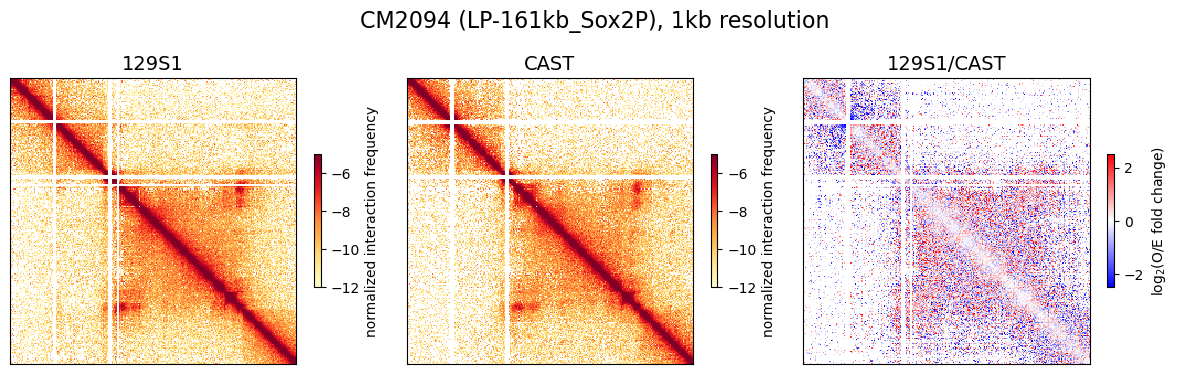

In [34]:
# Define parameters
data_path = '/DATA/projects/bvs_alleles/sox2_rcmc_custom/'
sample = 'CM2094'
title = 'LP-161kb_Sox2P'
resolution = 1000
chromosome = '3'
start = 34560000
end = 34820000
vmax = -5
vmin = -12

cool_file_129 = cooler.Cooler(f'{data_path}/coolers/{sample}.sox2_rcmc.129_allele.ss.mcool::resolutions/{resolution}')
cool_file_cast = cooler.Cooler(f'{data_path}/coolers/{sample}.sox2_rcmc.CAST_allele.ss.mcool::resolutions/{resolution}')
expected_129 = expected_cis(cool_file_129, ignore_diags = 0, nproc = 24)
expected_cast = expected_cis(cool_file_cast, ignore_diags = 0, nproc = 24)

fig = plt.figure(figsize = (12, 4))
plt.suptitle(sample + ' (' + title + '), ' + str(resolution//1000) + 'kb resolution', fontsize = 16)

matrix_129 = cool_file_129.matrix(balance=True, sparse=True).fetch(f'{chromosome}:{start}-{end}').toarray()
matrix_129 = np.nan_to_num(matrix_129)
matrix_cast = cool_file_cast.matrix(balance=True, sparse=True).fetch(f'{chromosome}:{start}-{end}').toarray()
matrix_cast = np.nan_to_num(matrix_cast)
oe_matrix_129 = calculate_observed_over_expected_rcmc_matrix(matrix_129, expected_129, chromosome)
oe_matrix_cast = calculate_observed_over_expected_rcmc_matrix(matrix_cast, expected_cast, chromosome)

ax = fig.add_subplot(131)
ax.set_title('129S1', fontsize = 14)
im = ax.matshow(np.log2(matrix_129), cmap='YlOrRd', vmin = vmin, vmax = vmax)
fig.colorbar(im, shrink = 0.4, label = 'normalized interaction frequency')
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(132)
ax.set_title('CAST', fontsize = 14)
im = ax.matshow(np.log2(matrix_cast), cmap='YlOrRd', vmin = vmin, vmax = vmax)
fig.colorbar(im, shrink = 0.4, label = 'normalized interaction frequency')
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(133)
ax.set_title('129S1/CAST', fontsize = 14)
im = ax.matshow(np.log2(oe_matrix_129/oe_matrix_cast), cmap='bwr', vmin = -2.5, vmax = 2.5)
fig.colorbar(im, shrink = 0.4, label = 'log$_2$(O/E fold change)')
plt.xticks([], [])
plt.yticks([], [])

plt.tight_layout()
plt.show()

INFO:root:creating a Pool of 24 workers
INFO:root:creating a Pool of 24 workers


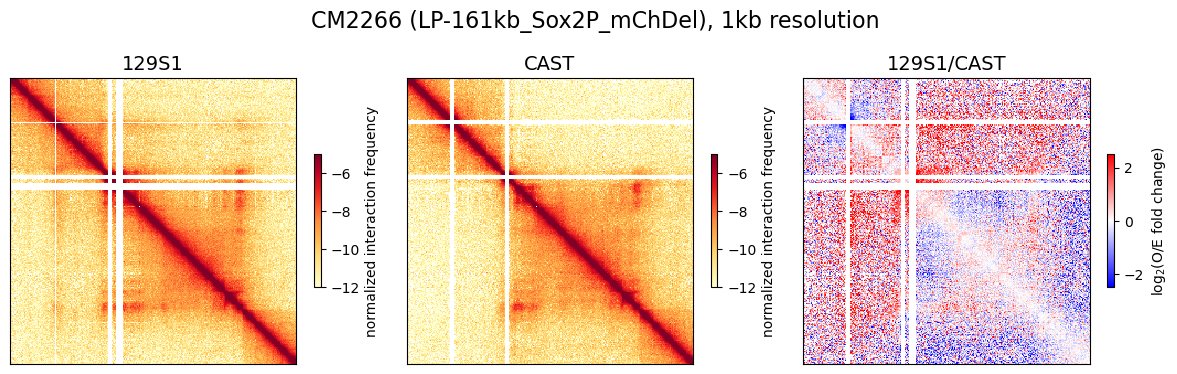

In [35]:
# Define parameters
data_path = '/DATA/projects/bvs_alleles/sox2_rcmc_custom/'
sample = 'CM2266'
title = 'LP-161kb_Sox2P_mChDel'
resolution = 1000
chromosome = '3'
start = 34560000
end = 34820000
vmax = -5
vmin = -12

cool_file_129 = cooler.Cooler(f'{data_path}/coolers/{sample}.sox2_rcmc.129_allele.ss.mcool::resolutions/{resolution}')
cool_file_cast = cooler.Cooler(f'{data_path}/coolers/{sample}.sox2_rcmc.CAST_allele.ss.mcool::resolutions/{resolution}')
expected_129 = expected_cis(cool_file_129, ignore_diags = 0, nproc = 24)
expected_cast = expected_cis(cool_file_cast, ignore_diags = 0, nproc = 24)

fig = plt.figure(figsize = (12, 4))
plt.suptitle(sample + ' (' + title + '), ' + str(resolution//1000) + 'kb resolution', fontsize = 16)

matrix_129 = cool_file_129.matrix(balance=True, sparse=True).fetch(f'{chromosome}:{start}-{end}').toarray()
matrix_129 = np.nan_to_num(matrix_129)
matrix_cast = cool_file_cast.matrix(balance=True, sparse=True).fetch(f'{chromosome}:{start}-{end}').toarray()
matrix_cast = np.nan_to_num(matrix_cast)
oe_matrix_129 = calculate_observed_over_expected_rcmc_matrix(matrix_129, expected_129, chromosome)
oe_matrix_cast = calculate_observed_over_expected_rcmc_matrix(matrix_cast, expected_cast, chromosome)

ax = fig.add_subplot(131)
ax.set_title('129S1', fontsize = 14)
im = ax.matshow(np.log2(matrix_129), cmap='YlOrRd', vmin = vmin, vmax = vmax)
fig.colorbar(im, shrink = 0.4, label = 'normalized interaction frequency')
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(132)
ax.set_title('CAST', fontsize = 14)
im = ax.matshow(np.log2(matrix_cast), cmap='YlOrRd', vmin = vmin, vmax = vmax)
fig.colorbar(im, shrink = 0.4, label = 'normalized interaction frequency')
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(133)
ax.set_title('129S1/CAST', fontsize = 14)
im = ax.matshow(np.log2(oe_matrix_129/oe_matrix_cast), cmap='bwr', vmin = -2.5, vmax = 2.5)
fig.colorbar(im, shrink = 0.4, label = 'log$_2$(O/E fold change)')
plt.xticks([], [])
plt.yticks([], [])

plt.tight_layout()
plt.show()

INFO:root:creating a Pool of 24 workers
INFO:root:creating a Pool of 24 workers


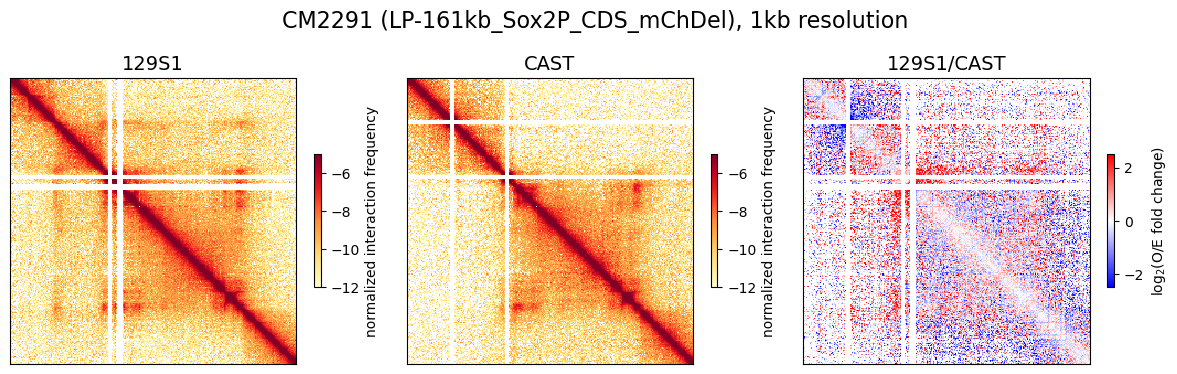

In [36]:
# Define parameters
data_path = '/DATA/projects/bvs_alleles/sox2_rcmc_custom/'
sample = 'CM2291'
title = 'LP-161kb_Sox2P_CDS_mChDel'
resolution = 1000
chromosome = '3'
start = 34560000
end = 34820000
vmax = -5
vmin = -12

cool_file_129 = cooler.Cooler(f'{data_path}/coolers/{sample}.sox2_rcmc.129_allele.ss.mcool::resolutions/{resolution}')
cool_file_cast = cooler.Cooler(f'{data_path}/coolers/{sample}.sox2_rcmc.CAST_allele.ss.mcool::resolutions/{resolution}')
expected_129 = expected_cis(cool_file_129, ignore_diags = 0, nproc = 24)
expected_cast = expected_cis(cool_file_cast, ignore_diags = 0, nproc = 24)

fig = plt.figure(figsize = (12, 4))
plt.suptitle(sample + ' (' + title + '), ' + str(resolution//1000) + 'kb resolution', fontsize = 16)

matrix_129 = cool_file_129.matrix(balance=True, sparse=True).fetch(f'{chromosome}:{start}-{end}').toarray()
matrix_129 = np.nan_to_num(matrix_129)
matrix_cast = cool_file_cast.matrix(balance=True, sparse=True).fetch(f'{chromosome}:{start}-{end}').toarray()
matrix_cast = np.nan_to_num(matrix_cast)
oe_matrix_129 = calculate_observed_over_expected_rcmc_matrix(matrix_129, expected_129, chromosome)
oe_matrix_cast = calculate_observed_over_expected_rcmc_matrix(matrix_cast, expected_cast, chromosome)

ax = fig.add_subplot(131)
ax.set_title('129S1', fontsize = 14)
im = ax.matshow(np.log2(matrix_129), cmap='YlOrRd', vmin = vmin, vmax = vmax)
fig.colorbar(im, shrink = 0.4, label = 'normalized interaction frequency')
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(132)
ax.set_title('CAST', fontsize = 14)
im = ax.matshow(np.log2(matrix_cast), cmap='YlOrRd', vmin = vmin, vmax = vmax)
fig.colorbar(im, shrink = 0.4, label = 'normalized interaction frequency')
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(133)
ax.set_title('129S1/CAST', fontsize = 14)
im = ax.matshow(np.log2(oe_matrix_129/oe_matrix_cast), cmap='bwr', vmin = -2.5, vmax = 2.5)
fig.colorbar(im, shrink = 0.4, label = 'log$_2$(O/E fold change)')
plt.xticks([], [])
plt.yticks([], [])

plt.tight_layout()
plt.show()

## Interaction between SCR and LP-161kb

In [37]:
data_path = '/DATA/projects/bvs_alleles/sox2_rcmc_custom/'
resolution = 1000

cool_file_cm2094_rep1_129 = cooler.Cooler(f'{data_path}/coolers/CM2094_rep1.sox2_rcmc.129_allele.ss.mcool::resolutions/{resolution}')
cool_file_cm2266_rep1_129 = cooler.Cooler(f'{data_path}/coolers/CM2266_rep1.sox2_rcmc.129_allele.ss.mcool::resolutions/{resolution}')
cool_file_cm2291_rep1_129 = cooler.Cooler(f'{data_path}/coolers/CM2291_rep1.sox2_rcmc.129_allele.ss.mcool::resolutions/{resolution}')
cool_file_cm2094_rep2_129 = cooler.Cooler(f'{data_path}/coolers/CM2094_rep2.sox2_rcmc.129_allele.ss.mcool::resolutions/{resolution}')
cool_file_cm2266_rep2_129 = cooler.Cooler(f'{data_path}/coolers/CM2266_rep2.sox2_rcmc.129_allele.ss.mcool::resolutions/{resolution}')
cool_file_cm2291_rep2_129 = cooler.Cooler(f'{data_path}/coolers/CM2291_rep2.sox2_rcmc.129_allele.ss.mcool::resolutions/{resolution}')

lp_scr_contacts_cm2094_rep1_129 = cool_file_cm2094_rep1_129.matrix(balance=True, sparse=True).fetch(f'{chromosome}:{landing_pad_161kb_insert_start}-{landing_pad_161kb_insert_end}', 
                                                             f'{chromosome}:{scr_start}-{scr_end}').toarray()
lp_scr_contacts_cm2266_rep1_129 = cool_file_cm2266_rep1_129.matrix(balance=True, sparse=True).fetch(f'{chromosome}:{landing_pad_161kb_insert_start}-{landing_pad_161kb_insert_end}', 
                                                             f'{chromosome}:{scr_start}-{scr_end}').toarray()
lp_scr_contacts_cm2291_rep1_129 = cool_file_cm2291_rep1_129.matrix(balance=True, sparse=True).fetch(f'{chromosome}:{landing_pad_161kb_insert_start}-{landing_pad_161kb_insert_end}', 
                                                             f'{chromosome}:{scr_start}-{scr_end}').toarray()
lp_scr_contacts_cm2094_rep2_129 = cool_file_cm2094_rep2_129.matrix(balance=True, sparse=True).fetch(f'{chromosome}:{landing_pad_161kb_insert_start}-{landing_pad_161kb_insert_end}', 
                                                             f'{chromosome}:{scr_start}-{scr_end}').toarray()
lp_scr_contacts_cm2266_rep2_129 = cool_file_cm2266_rep2_129.matrix(balance=True, sparse=True).fetch(f'{chromosome}:{landing_pad_161kb_insert_start}-{landing_pad_161kb_insert_end}', 
                                                             f'{chromosome}:{scr_start}-{scr_end}').toarray()
lp_scr_contacts_cm2291_rep2_129 = cool_file_cm2291_rep2_129.matrix(balance=True, sparse=True).fetch(f'{chromosome}:{landing_pad_161kb_insert_start}-{landing_pad_161kb_insert_end}', 
                                                             f'{chromosome}:{scr_start}-{scr_end}').toarray()

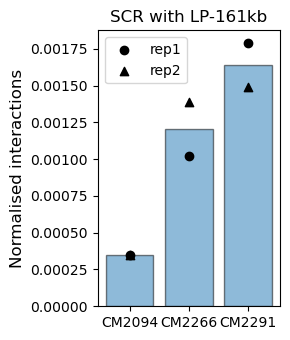

In [38]:
plt.figure(figsize = (3, 3.5))
plt.title('SCR with LP-161kb')
plt.bar(x = [0, 1, 2], height = [(np.nanmean(lp_scr_contacts_cm2094_rep1_129) + np.nanmean(lp_scr_contacts_cm2094_rep2_129))/2, 
                                 (np.nanmean(lp_scr_contacts_cm2266_rep1_129) + np.nanmean(lp_scr_contacts_cm2266_rep2_129))/2, 
                                 (np.nanmean(lp_scr_contacts_cm2291_rep1_129) + np.nanmean(lp_scr_contacts_cm2291_rep2_129))/2],
       edgecolor = 'k', lw = 1, alpha = 0.5)
plt.scatter(x = [0, 1, 2], y = [np.nanmean(lp_scr_contacts_cm2094_rep1_129), np.nanmean(lp_scr_contacts_cm2266_rep1_129), np.nanmean(lp_scr_contacts_cm2291_rep1_129)],
            color = 'k', edgecolor = 'k', lw = 1, label = 'rep1')
plt.scatter(x = [0, 1, 2], y = [np.nanmean(lp_scr_contacts_cm2094_rep2_129), np.nanmean(lp_scr_contacts_cm2266_rep2_129), np.nanmean(lp_scr_contacts_cm2291_rep2_129)],
            color = 'k', edgecolor = 'k', lw = 1, label = 'rep2', marker = '^')
plt.xticks([0, 1, 2], ['CM2094', 'CM2266', 'CM2291'])
plt.ylabel('Normalised interactions', fontsize = 12)
plt.legend()
plt.tight_layout()
plt.show()